In [1]:
import numpy as np
import openmc
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
mats = openmc.Materials().from_xml()
geom = openmc.Geometry().from_xml()
stainless = mats[0]
fuel = mats[1]
hp_vap_mat = mats[2]
hp_liq_mat = mats[3]

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)

settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.inactive = 10
settings.particles = 10000

/home/ubuntu/.local/lib/python3.6/site-packages/openmc/mixin.py:71: IDWarning: Another Material instance already exists with id=10000.
  warn(msg, IDWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/openmc/mixin.py:71: IDWarning: Another Material instance already exists with id=10001.
  warn(msg, IDWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/openmc/mixin.py:71: IDWarning: Another Material instance already exists with id=10002.
  warn(msg, IDWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/openmc/mixin.py:71: IDWarning: Another Material instance already exists with id=10003.
  warn(msg, IDWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/openmc/mixin.py:71: IDWarning: Another Material instance already exists with id=90000.
  warn(msg, IDWarning)


In [13]:
tallies = openmc.Tallies()

tally = openmc.Tally(tally_id=1, name="total rxns")
tally.scores = ['kappa-fission', 'fission', 'flux', 
                'H1-production', 'H2-production', 
                'H3-production', 'He3-production', 
                'He4-production']

tallies.append(tally)

tally = openmc.Tally(tally_id=2, name="fuel rxns")
tally.filters = [openmc.MaterialFilter(fuel)]
tally.scores = ['kappa-fission', 'fission', 'flux', 
                'H1-production', 'H2-production', 
                'H3-production', 'He3-production', 
                'He4-production']

tallies.append(tally)

tally = openmc.Tally(tally_id=3, name="clad rxns")
tally.scores = ['damage-energy', 'flux', 
                'H1-production', 'H2-production', 
                'H3-production', 'He3-production', 
                'He4-production']
tally.filters = [openmc.MaterialFilter(stainless)]
tallies.append(tally)

In [ ]:
for i, rd in enumerate(np.linspace(0, 0.4, num=41)):
    geom.get_all_surfaces()[1].r = 0.71 - rd
    geom.get_all_surfaces()[2].r = 0.7875 - rd
    geom.get_all_surfaces()[3].r = 0.8875 - rd
    geom.get_all_surfaces()[4].r = 0.8939 - rd
    geom.get_all_surfaces()[5].r = 0.9339 - rd
    geom.get_all_surfaces()[6].r = 0.9403 - rd
    
    path = '/home/ubuntu/pincell/{:02d}'.format(i)
    os.mkdir(path)
    os.chdir(path)
    
    geom.export_to_xml()
    mats.export_to_xml()
    settings.export_to_xml()
    tallies.export_to_xml()
    openmc.run()


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

       91/1    1.37264    1.37473 +/- 0.00126
       92/1    1.39080    1.37493 +/- 0.00126
       93/1    1.36922    1.37486 +/- 0.00124
       94/1    1.36121    1.37469 +/- 0.00124
       95/1    1.38370    1.37480 +/- 0.00123
       96/1    1.37381    1.37479 +/- 0.00121
       97/1    1.37807    1.37483 +/- 0.00120
       98/1    1.38620    1.37496 +/- 0.00119
       99/1    1.38229    1.37504 +/- 0.00118
      100/1    1.38982    1.37520 +/- 0.00118
 Creating state point statepoint.100.h5...

 =======================>     TIMING STATISTICS     <=======================

 Total time for initialization     = 6.1154e+00 seconds
   Reading cross sections          = 6.0887e+00 seconds
 Total time in simulation          = 1.6346e+03 seconds
   Time in transport only          = 1.6344e+03 seconds
   Time in inactive batches        = 6.3998e+01 seconds
   Time in active batches          = 1.5706e+03 seconds
   Time synchronizing fission bank = 7.7595e-02 seconds
     Sampling source sites

       53/1    1.37654    1.37850 +/- 0.00166
       54/1    1.35201    1.37790 +/- 0.00173
       55/1    1.36808    1.37768 +/- 0.00170
       56/1    1.38915    1.37793 +/- 0.00168
       57/1    1.39821    1.37836 +/- 0.00170
       58/1    1.38132    1.37842 +/- 0.00167
       59/1    1.36940    1.37824 +/- 0.00164
       60/1    1.40014    1.37867 +/- 0.00167
       61/1    1.38759    1.37885 +/- 0.00164
       62/1    1.35953    1.37848 +/- 0.00166
       63/1    1.36272    1.37818 +/- 0.00165
       64/1    1.38998    1.37840 +/- 0.00163
       65/1    1.36869    1.37822 +/- 0.00161
       66/1    1.37638    1.37819 +/- 0.00159
       67/1    1.37533    1.37814 +/- 0.00156
       68/1    1.37998    1.37817 +/- 0.00153
       69/1    1.37711    1.37815 +/- 0.00151
       70/1    1.37281    1.37806 +/- 0.00148
       71/1    1.36559    1.37786 +/- 0.00147
       72/1    1.38693    1.37800 +/- 0.00146
       73/1    1.36327    1.37777 +/- 0.00145
       74/1    1.39401    1.37802 

       15/1    1.37928    1.38089 +/- 0.00224
       16/1    1.38862    1.38218 +/- 0.00224
       17/1    1.38697    1.38286 +/- 0.00201
       18/1    1.38407    1.38301 +/- 0.00175
       19/1    1.38611    1.38336 +/- 0.00158
       20/1    1.38673    1.38369 +/- 0.00145
       21/1    1.37705    1.38309 +/- 0.00145
       22/1    1.38761    1.38347 +/- 0.00137
       23/1    1.37705    1.38297 +/- 0.00136
       24/1    1.39503    1.38383 +/- 0.00152
       25/1    1.38485    1.38390 +/- 0.00142
       26/1    1.39183    1.38440 +/- 0.00142
       27/1    1.37680    1.38395 +/- 0.00140
       28/1    1.39855    1.38476 +/- 0.00155
       29/1    1.37511    1.38425 +/- 0.00155
       30/1    1.37787    1.38393 +/- 0.00151
       31/1    1.36884    1.38322 +/- 0.00160
       32/1    1.39542    1.38377 +/- 0.00163
       33/1    1.38611    1.38387 +/- 0.00156
       34/1    1.37870    1.38366 +/- 0.00151
       35/1    1.36800    1.38303 +/- 0.00158
       36/1    1.37909    1.38288 

In [3]:
mats = openmc.Materials().from_xml(path='../SPR/materials.xml')

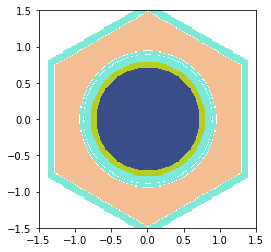

In [15]:
fuel_pin.plot(width=(3.0,3.0), color_by='material')

In [5]:
hp_vap = openmc.Cell(name='HP vapor')
hp_vap.region = -hp_vap_rad
hp_vap.fill = hp_vap_mat

In [6]:
hp_liq = openmc.Cell(name='HP liq')
hp_liq.region = -hp_liq_rad & +hp_vap_rad
hp_liq.fill = hp_liq_mat

In [7]:
hp_clad = openmc.Cell(name='HP clad')
hp_clad.region = -hp_ss_clad_radius & +hp_liq_rad
hp_clad.fill = stainless

In [8]:
hp_gap = openmc.Cell(name='HP gap')
hp_gap.region = -hp_gap_radius & +hp_ss_clad_radius
hp_gap.fill = None

In [9]:
fuel_inner_clad = openmc.Cell(name='Fuel Inner Clad')
fuel_inner_clad.region = -inner_fuel_clad_radius & +hp_gap_radius
fuel_inner_clad.fill = stainless

In [10]:
fuel_inner_gap = openmc.Cell(name='Fuel Inner Gap')
fuel_inner_gap.region = -inner_fuel_gap_radius & +inner_fuel_clad_radius
fuel_inner_gap.fill = None

In [11]:
fiss = openmc.Cell(name='Fuel')
fiss.region = fuel_hex & +inner_fuel_gap_radius
fiss.fill = fuel

In [12]:
fuel_outer_gap = openmc.Cell(name='Fuel Outer Gap')
fuel_outer_gap.region = gap_hex & openmc.Complement(fuel_hex)
fuel_outer_gap.fill = None

In [13]:
outer_clad = openmc.Cell(name='Outer Clad')
outer_clad.region = outer_fuel_ss_clad & openmc.Complement(gap_hex)
outer_clad.fill = stainless

In [15]:
outer_unit_shape = openmc.model.hexagonal_prism(edge_length=1.6085, orientation='y', boundary_type='reflective')
outer_unit = openmc.Cell(name='Outer Unit')
outer_unit.region = outer_unit_shape & openmc.Complement(outer_fuel_ss_clad)
outer_unit.fill = None

In [16]:
fuel_pin = openmc.Universe(cells=(hp_vap, hp_liq, hp_clad, hp_gap, fuel_inner_clad, fuel_inner_gap, fiss, fuel_outer_gap, outer_clad, outer_unit))

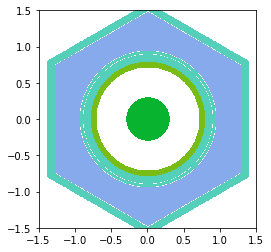

In [25]:
hp_vap_rad = openmc.ZCylinder(r=0.3, surface_id=1)
hp_vap.region = -hp_vap_rad
fuel_pin.plot(basis='xy', width=(3.0,3.0), pixels=(500, 500), color_by='material')

In [18]:
geom = openmc.Geometry(fuel_pin)
geom.export_to_xml()
mats.export_to_xml()

In [20]:
point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)

settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.inactive = 10
settings.particles = 1000
settings.export_to_xml()

In [21]:
import os
import numpy as np


In [23]:
formatdir = '/home/ubuntu/pincell/{}'
rad_d = 

'/home/ubuntu/pincell'

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 ])